In [104]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize
from copy import deepcopy

## Downloading stock price data

In [2]:


# List of 30 popular stock symbols
symbols = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "BRK-B", "JPM", "JNJ", "V",
    "PG", "UNH", "HD", "MA", "NVDA", "DIS", "BAC", "ADBE", "CMCSA", "XOM",
    "NFLX", "VZ", "CSCO", "PEP", "INTC", "KO", "WMT", "MRK", "PFE", "T"
]

# Calculate the start date (200 trading days ago)
end_date = datetime.now()
start_date = end_date - timedelta(days=800)  # Using 300 calendar days to ensure we get 200 trading days

# Function to download data for a single stock
def download_stock_data(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(start=start_date, end=end_date)
    return data['Close']

# Download data for all stocks
stockPrice_df = pd.DataFrame()
for symbol in symbols:
    print(f"Downloading data for {symbol}...")
    stock_data = download_stock_data(symbol)
    stockPrice_df[symbol] = stock_data

# # Ensure we have exactly 200 trading days
# all_data = all_data.tail(200)

# # Save to CSV
# all_data.to_csv("stock_prices_200days.csv")
# print("Data saved to stock_prices_200days.csv")

# # Display the first few rows
# print(all_data.head())

## Caluclating mean percentage return and volatility (std)

In [4]:
return_pt_df = stockPrice_df.pct_change().dropna()
#Return centered
return_pt_df_cent = return_pt_df - return_pt_df.mean()

In [34]:
mean_return_pt = return_pt_df.mean()
vol_pct = return_pt_df.var()

In [35]:
from matplotlib import pyplot as plt

### Visualizing mean pct return and volatility

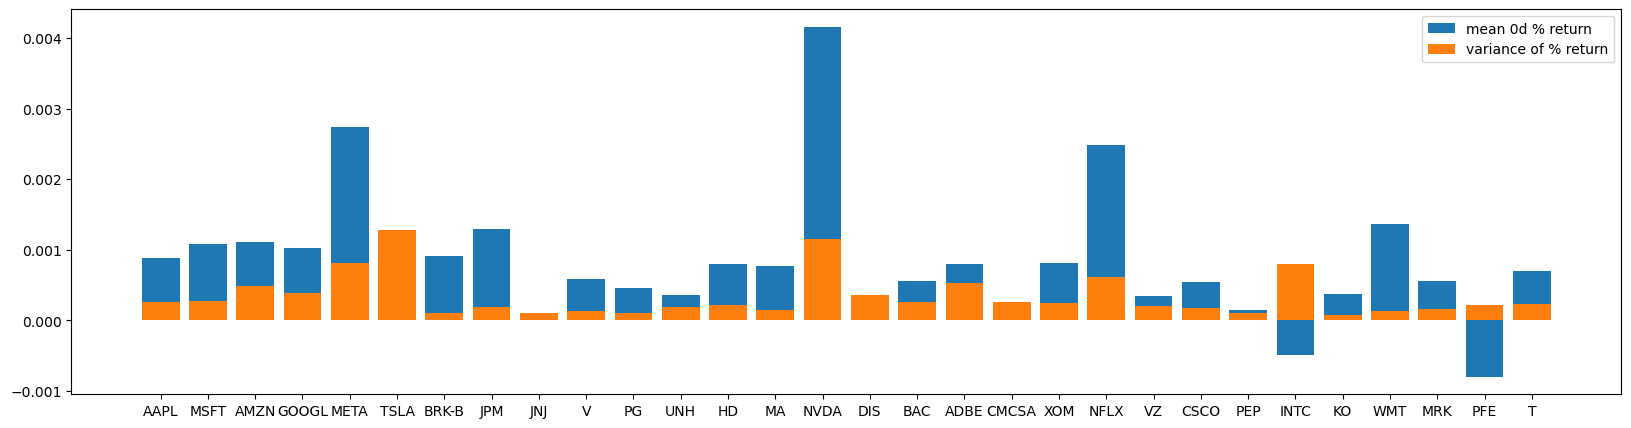

In [58]:
plt.figure(figsize=(20, 5))
plt.bar(mean_return_pt.index, mean_return_pt, label="mean 0d % return")
plt.bar(vol_pct.index, vol_pct, label="variance of % return")
plt.legend()


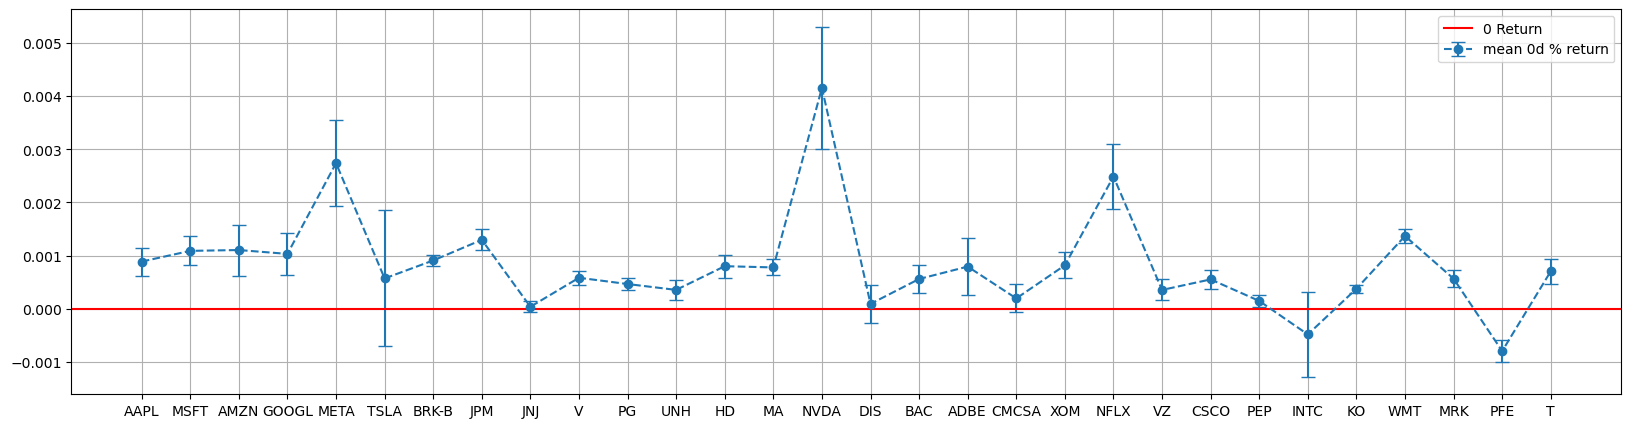

In [57]:
plt.figure(figsize=(20, 5))
plt.errorbar(mean_return_pt.index, mean_return_pt, vol_pct,
             label="mean 0d % return", marker='o', fmt="--", capsize=5)
plt.axhline(y=0, label='0 Return', color='red')
plt.grid()
plt.legend()

### Finding covariance matrix

In [51]:
cov_matrix = (return_pt_df_cent.T @ return_pt_df_cent)/(return_pt_df_cent.shape[0]-1)
cov_matrix

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,BRK-B,JPM,JNJ,V,...,NFLX,VZ,CSCO,PEP,INTC,KO,WMT,MRK,PFE,T
AAPL,0.000264,0.000169,0.000181,0.000185,0.000207,2.652189e-04,0.000083,0.000068,2.322284e-05,0.000089,...,0.000179,0.000039,0.000089,0.000039,0.000177,0.000045,0.000044,0.000022,0.000042,0.000038
MSFT,0.000169,0.000273,0.000240,0.000220,0.000268,2.032673e-04,0.000076,0.000063,1.773920e-05,0.000084,...,0.000188,0.000027,0.000088,0.000038,0.000197,0.000043,0.000047,0.000014,0.000049,0.000014
AMZN,0.000181,0.000240,0.000480,0.000276,0.000357,3.106920e-04,0.000087,0.000084,1.051542e-05,0.000096,...,0.000246,0.000037,0.000106,0.000029,0.000237,0.000036,0.000070,0.000007,0.000041,0.000045
GOOGL,0.000185,0.000220,0.000276,0.000391,0.000316,2.256729e-04,0.000085,0.000070,1.896080e-05,0.000082,...,0.000197,0.000035,0.000101,0.000035,0.000191,0.000039,0.000050,0.000020,0.000046,0.000026
META,0.000207,0.000268,0.000357,0.000316,0.000810,2.749074e-04,0.000091,0.000088,1.339240e-05,0.000101,...,0.000278,0.000048,0.000097,0.000024,0.000262,0.000026,0.000041,0.000003,0.000053,0.000030
TSLA,0.000265,0.000203,0.000311,0.000226,0.000275,1.279784e-03,0.000089,0.000127,4.824480e-07,0.000121,...,0.000286,0.000028,0.000107,0.000043,0.000285,0.000029,0.000069,-0.000017,0.000042,0.000021
BRK-B,0.000083,0.000076,0.000087,0.000085,0.000091,8.930130e-05,0.000104,0.000092,4.005272e-05,0.000067,...,0.000087,0.000042,0.000063,0.000040,0.000096,0.000046,0.000042,0.000035,0.000054,0.000047
JPM,0.000068,0.000063,0.000084,0.000070,0.000088,1.270507e-04,0.000092,0.000195,3.595313e-05,0.000072,...,0.000085,0.000043,0.000069,0.000028,0.000122,0.000039,0.000034,0.000030,0.000057,0.000054
JNJ,0.000023,0.000018,0.000011,0.000019,0.000013,4.824480e-07,0.000040,0.000036,1.019260e-04,0.000030,...,0.000007,0.000034,0.000034,0.000043,0.000019,0.000040,0.000028,0.000050,0.000068,0.000038
V,0.000089,0.000084,0.000096,0.000082,0.000101,1.205039e-04,0.000067,0.000072,3.010374e-05,0.000135,...,0.000099,0.000036,0.000065,0.000038,0.000095,0.000043,0.000035,0.000029,0.000039,0.000039


In [52]:
mean_return_np = mean_return_pt.to_numpy()

cov_matrix_np = cov_matrix.to_numpy()

## Optimization

In [79]:
def portfol_mean(weights_, mean_returns_):
    return np.dot(weights_, mean_returns_)

def portfol_var(weights_, cov_matrix_):
    return np.dot(weights_.T, cov_matrix_@weights_)

# Portfolio optimization function with L1 penalty and constraints
def portfolio_loss(weights, mean_returns, cov_matrix, vol_penalty, sparse_penalty, sparse_function=None):
    # Calculate portfolio return
    portfolio_return = portfol_mean(weights, mean_returns)
    
    # Calculate portfolio variance 
    portfolio_variance = portfol_var(weights, cov_matrix)
    
    # Loss function: negative of return, variance, and L1 penalty
    # Note: Other desirable features for the portfolio can be added as losses here. 
    if sparse_function is None:
        sparse_function = lambda weights: np.sum(np.abs(weights))
    loss = -portfolio_return + vol_penalty * portfolio_variance + sparse_penalty * sparse_function(weights)
    
    return loss



# Function to optimize the portfolio with multiple constraints
def optimize_portfolio(mean_returns, cov_matrix, vol_penalty=1.0, sparse_penalty=0.0, sparse_function = None, 
                       initial_guess = None, 
                       fixed_weights=None, weight_bounds=None, portfolio_size=1,
                       equality_constraints=None, inequality_constraints=None,
                       method='SLSQP'):
    """
    Choice of optimizers: SLSQP (Sequential Least Squares Programming), COBYLA, etc.
    """
    
    num_assets = len(mean_returns)
    
    # Initial guess: Equal weight for each stock
    initial_weights = portfolio_size*np.ones(num_assets) / num_assets

    # Setting initial guess if any is provided
    if initial_guess is not None:
        for i, initial_weight in initial_guess.items():
            initial_weights[i] = initial_weight
    
    # Setting bounds for each weight. bound <= portfolio size
    if weight_bounds is None:
        bounds = [(0, portfolio_size) for _ in range(num_assets)]
    if weight_bounds is not None:
        bounds = [(weight_bounds[i][0], weight_bounds[i][1]) if i in weight_bounds else (0, portfolio_size) for i in range(num_assets)]
    
    # Ensure fixed weights by adjusting bounds to fix those specific weights
    if fixed_weights is not None:
        for i, fixed_weight in fixed_weights.items():
            bounds[i] = (fixed_weight, fixed_weight)  # Fix weight to the specified value
            initial_weights[i] = fixed_weight

    # Constraints: List of equality and inequality constraints
    constraints = []

    # Equality constraints (weights sum to portfolio_size is a default equality constraint)
    if equality_constraints is None:
        constraints.append({'type': 'eq', 'fun': lambda weights: np.sum(weights) - portfolio_size})
    else:
        # Add custom equality constraints
        for eq in equality_constraints:
            constraints.append({'type': 'eq', 'fun': eq})

    # Inequality constraints (optional, non-negative values mean they are satisfied)
    if inequality_constraints is not None:
        for ineq in inequality_constraints:
            constraints.append({'type': 'ineq', 'fun': ineq})

    if method == "COBYLA":
        result = minimize(portfolio_loss,
                      initial_weights,
                      args=(mean_returns, cov_matrix, vol_penalty, sparse_penalty, sparse_function),
                      method=method,
                      bounds=bounds)
    else:
        # Perform optimization using specified method
        result = minimize(portfolio_loss,
                          initial_weights,
                          args=(mean_returns, cov_matrix, vol_penalty, sparse_penalty, sparse_function),
                          method=method,
                          bounds=bounds,
                          constraints=constraints)
    
    return result

## No constraints and bounds

In [80]:
mean_return_pt.index

Index(['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'BRK-B', 'JPM', 'JNJ',
       'V', 'PG', 'UNH', 'HD', 'MA', 'NVDA', 'DIS', 'BAC', 'ADBE', 'CMCSA',
       'XOM', 'NFLX', 'VZ', 'CSCO', 'PEP', 'INTC', 'KO', 'WMT', 'MRK', 'PFE',
       'T'],
      dtype='object')

In [164]:
portfolio_size = 1 #the fraction gives the percentage of each stock
num_stocks = len(mean_return_np)

# Example data (mean returns and covariance matrix)
mean_returns = mean_return_np
cov_matrix = cov_matrix_np

# volatility parameter and L1 penalty
vol_penalty = 0.05 # Adjust this to control the risk tolerance
sparse_penalty = 0.001     # sparse penalty to promote sparsity in portfolio weights

# # Example fixed weights: Fix the weight of Apple to 10% of portfolio
fixed_weights = {0: 0.1*portfolio_size}
# fixed_weights = None

# # Example bounds: Set bounds for certain stocks
# weight_bounds = {1: (0.1, 0.5), 3: (0.0, 0.2)}  # Stock 2 between 10% and 50%, Stock 4 between 0% and 20%

#None of the stocks should be >30% of the portfolio
weight_bounds = {i: (0, portfolio_size/3) for i in range(num_stocks)}

# Example equality constraint: Ensure sum of weights is portfolio size (default behavior)
equality_constraints = [lambda weights: np.sum(weights) - portfolio_size]

# # Example inequality constraint: Ensure that at least 40% of the portfolio is invested in stocks 2 and 3 combined
# inequality_constraints = [lambda weights: np.sum(weights[1:3]) - 0.4]
inequality_constraints = None

# Optimizer options: 'SLSQP', 'COBYLA', etc.
methods = {'SLSQP', 'COBYLA', 'L-BFGS-B', 'trust-constr'}
# methods = {'SLSQP', 'L-BFGS-B'}


opt_portfolio_dict = {}
for method in methods:
    # Optimize portfolio
    optimal_portfolio = optimize_portfolio(mean_returns, cov_matrix, vol_penalty, sparse_penalty, sparse_function=None,
                                           initial_guess= None,
                                           fixed_weights=fixed_weights, weight_bounds=weight_bounds, 
                                           equality_constraints=equality_constraints, 
                                           portfolio_size=portfolio_size,
                                           inequality_constraints=inequality_constraints, 
                                           method=method)
    opt_portfolio_dict[method] = optimal_portfolio.x

# # Output the results
# print("Optimal Weights:", optimal_portfolio.x)
# print("Optimal Loss:", optimal_portfolio.fun)
# print("Success:", optimal_portfolio.success)


/var/folders/1h/sr7kc8_d5pddvym2zw5gv28r0000gn/T/ipykernel_63000/2726842478.py:81: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  result = minimize(portfolio_loss,


SLSQP mean return:  0.0029631225957778536
SLSQP variance:  0.0004773484430180481
trust-constr mean return:  0.0014175857385417268
trust-constr variance:  0.00014682028307675237
L-BFGS-B mean return:  0.0019873621461015353
L-BFGS-B variance:  0.00022304847624932104
COBYLA mean return:  0.0019873621461015357
COBYLA variance:  0.000223048476249321


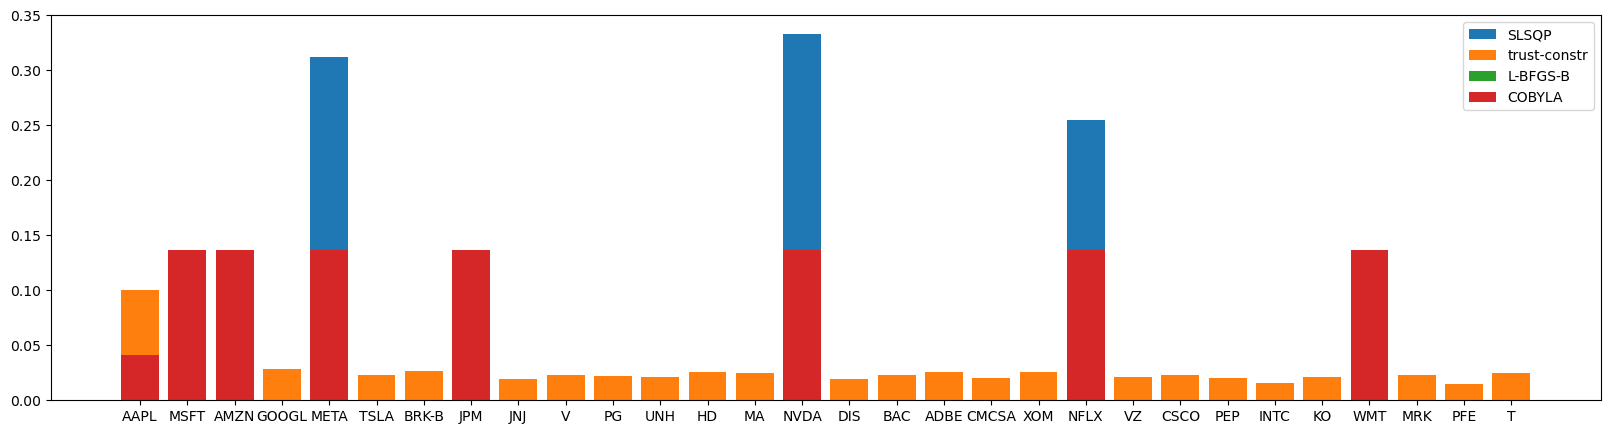

In [165]:
plt.figure(figsize=(20,5))
# mean_return_pt_appended = deepcopy(mean_return_pt)
# vol_pct_appended = deepcopy(vol_pct)
opt_portfol_mean_dict = {}
opt_portfol_var_dict = {}




for method in methods:
    adjusted_mean = (portfol_mean(opt_portfolio_dict[method], mean_return_np))/np.sum(opt_portfolio_dict[method])
    adjusted_variance = (portfol_var(opt_portfolio_dict[method], cov_matrix))/np.sum(opt_portfolio_dict[method])**2
    print(method+" mean return: ", adjusted_mean)
    print(method+" variance: ", adjusted_variance)
    plt.bar(mean_return_pt.index, opt_portfolio_dict[method]/np.sum(opt_portfolio_dict[method]), label=method)
    opt_portfol_mean_dict[method] = adjusted_mean
    opt_portfol_var_dict[method] = adjusted_variance
plt.legend()

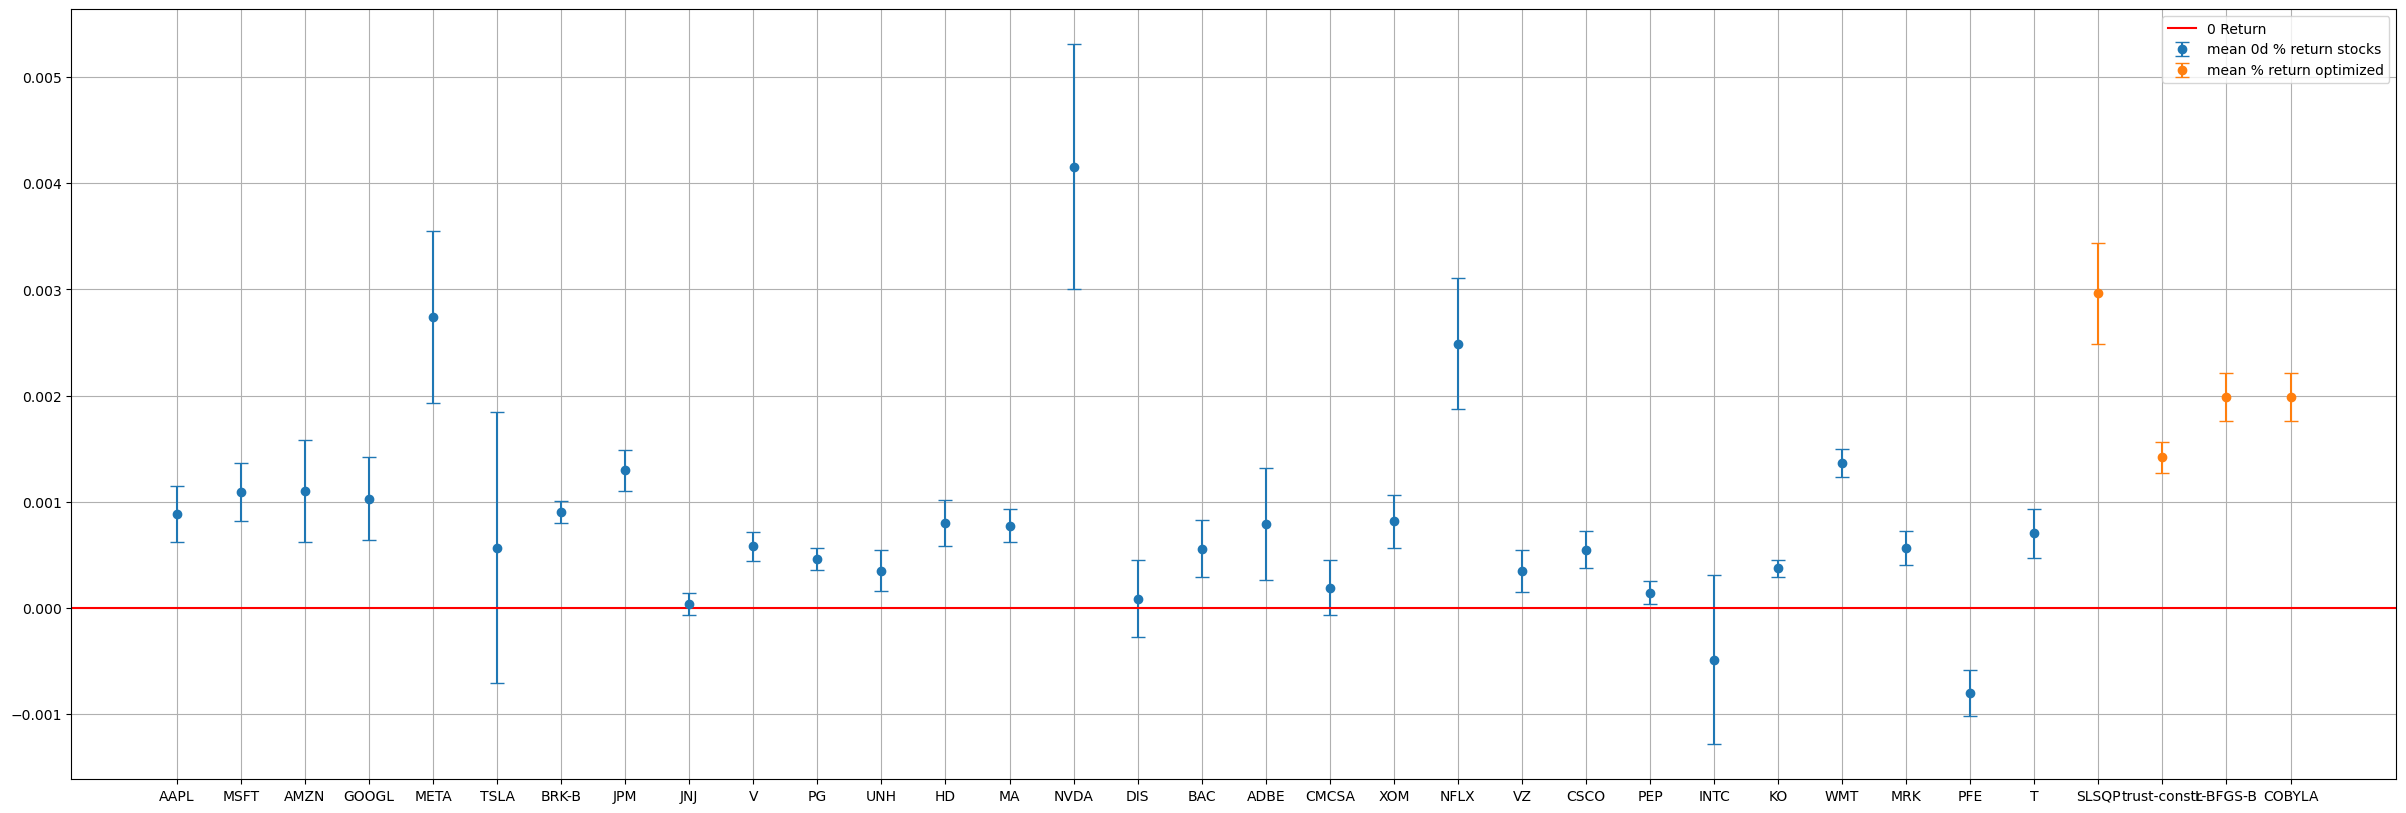

In [166]:
plt.figure(figsize=(30, 10))
plt.errorbar(mean_return_pt.index, mean_return_pt, vol_pct,
             label="mean 0d % return stocks", marker='o', fmt=" ", capsize=5)
plt.errorbar(list(opt_portfol_mean_dict.keys()), list(opt_portfol_mean_dict.values()), list(opt_portfol_var_dict.values()),
             label="mean % return optimized", marker='o', fmt=" ", capsize=5)
plt.axhline(y=0, label='0 Return', color='red')
plt.grid()
plt.legend()

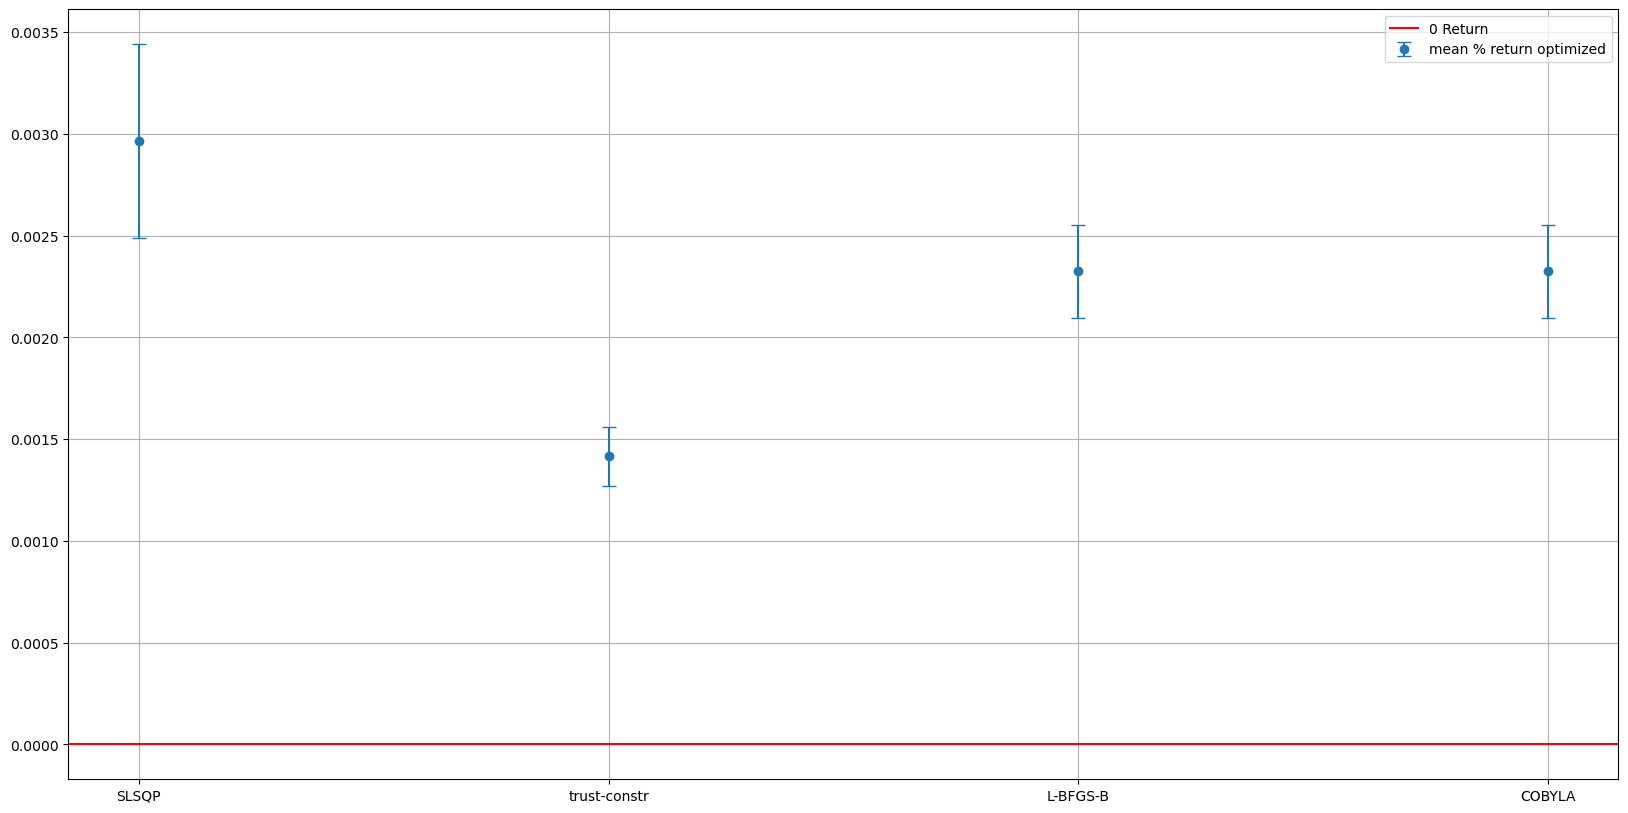

In [163]:
plt.figure(figsize=(20, 10))
plt.errorbar(list(opt_portfol_mean_dict.keys()), list(opt_portfol_mean_dict.values()), list(opt_portfol_var_dict.values()),
             label="mean % return optimized", marker='o', fmt=" ", capsize=5)
plt.axhline(y=0, label='0 Return', color='red')
plt.grid()
plt.legend()